# 1.&nbsp;natgas

This notebook is created to test if we can prdeict the normal prices of natural gas when we ignore day to day volitility form purely the inventory. The reason for this is due to the supply of natural gas coming from the US. US also produces most of the natural gas that it requires locally. This means that the prices are less volatile to the external/geo political changes.

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Lets get all the data that we need to make checks about the data

In [2]:
inventories = pd.read_csv('./data/eia_inventories.csv')
prices = pd.read_csv('./data/henryhub_price.csv')
exports = pd.read_csv('./data/natural_gas_exports.csv')
imports = pd.read_csv('./data/natgas_imports.csv')
inventories.columns


Index(['Date', 'Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)'], dtype='object')

# 2.&nbsp; Testing correlations

In [3]:
inventories_price = pd.concat([inventories.add_suffix('_front'), prices], axis=1)
inventories_price.tail()

,Date_front,Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)_front,Date,Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)
735,"Feb 02, 2024",2584,"Feb 02, 2024",2.21
736,"Feb 09, 2024",2530,"Feb 09, 2024",1.93
737,"Feb 16, 2024",2470,"Feb 16, 2024",1.59
738,"Feb 23, 2024",2374,"Feb 23, 2024",1.56
739,"Mar 01, 2024",2334,"Mar 01, 2024",1.58


In [4]:
from sklearn import linear_model

mdl = linear_model.LinearRegression()
x = np.array(inventories['Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)']).reshape((-1, 1))
y = np.array(prices['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'])
mdl.fit(x,y)
print(mdl.coef_)
r_sq = mdl.score(x, y)
print(r_sq)

[-0.00030201]
0.028399228798169918


We can see that the information that we are using is wrong or inventories have no effect on the prices. but this is not true, it makes no senese that inventories have no effect on the price. we can see that the price and data are not using the same measurements. 

In [5]:
def turn_billions_cubic_feet_to_Million_btu(x):
    return x*1036*1000

In [6]:
inventories_price['Million Btu'] = list(map(turn_billions_cubic_feet_to_Million_btu, inventories_price['Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)_front']))
inventories_price['trend'] = inventories_price.index
inventories_price

,Date_front,Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)_front,Date,Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu),Million Btu,trend
0,"Jan 01, 2010",3117,"Jan 01, 2010",5.88,3229212000,0
1,"Jan 08, 2010",2850,"Jan 08, 2010",6.56,2952600000,1
2,"Jan 15, 2010",2607,"Jan 15, 2010",5.68,2700852000,2
3,"Jan 22, 2010",2521,"Jan 22, 2010",5.56,2611756000,3
4,"Jan 29, 2010",2406,"Jan 29, 2010",5.47,2492616000,4
...,...,...,...,...,...,...
735,"Feb 02, 2024",2584,"Feb 02, 2024",2.21,2677024000,735
736,"Feb 09, 2024",2530,"Feb 09, 2024",1.93,2621080000,736
737,"Feb 16, 2024",2470,"Feb 16, 2024",1.59,2558920000,737
738,"Feb 23, 2024",2374,"Feb 23, 2024",1.56,2459464000,738


In [7]:
x = inventories_price[['Million Btu', 'trend']]
y = np.array(prices['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'])

mdl.fit(x,y)
print(mdl.coef_)
r_sq = mdl.score(x, y)
print(r_sq)
print(x)

[-2.91225272e-10 -3.27801995e-04]
0.0311487484156302
     Million Btu  trend
0     3229212000      0
1     2952600000      1
2     2700852000      2
3     2611756000      3
4     2492616000      4
..           ...    ...
735   2677024000    735
736   2621080000    736
737   2558920000    737
738   2459464000    738
739   2418024000    739

[740 rows x 2 columns]


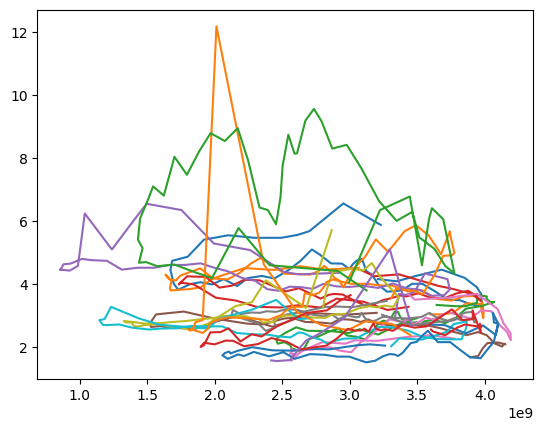

In [8]:
import matplotlib.pyplot as plt


inventories_price
inventories_price.drop(['Date', 'trend'], axis=1)
inventories_price['Date_front'] = pd.to_datetime(inventories_price['Date_front'])
inventories_price['year'] = inventories_price['Date_front'].dt.year
inventories_price['month'] = inventories_price['Date_front'].dt.month
for year in inventories_price['year'].unique():
    year_data = inventories_price[inventories_price['year'] == year]
    plt.plot(year_data['Million Btu'], year_data['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'], label=str(year))



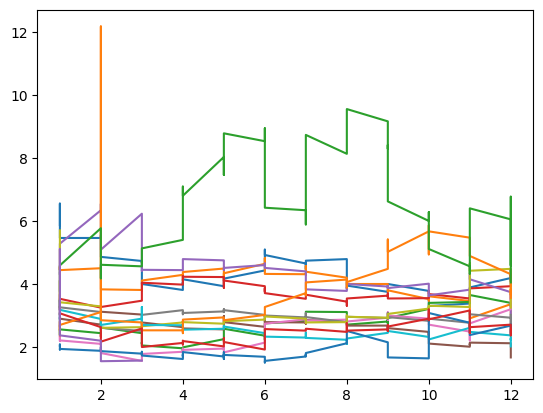

In [9]:
for year in inventories_price['year'].unique():
    year_data = inventories_price[inventories_price['year'] == year]
    plt.plot(year_data['month'], year_data['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'], label=str(year))

# 3.&nbsp; Adding weather and exports

In [10]:
exports['Date'] = pd.to_datetime(exports['Date'])
exports['year'] = exports['Date'].dt.year
exports['month'] = exports['Date'].dt.month

inventories_price_export = pd.merge(inventories_price, exports, on=['year', 'month'], how='outer')
inventories_price_export.drop(['Date_y', 'Date_x'], axis=1)

imports['Date'] = pd.to_datetime(imports['Date'])
imports['year'] = imports['Date'].dt.year
imports['month'] = imports['Date'].dt.month

inventories_price_export = pd.merge(inventories_price_export, imports, on=['year', 'month'], how='outer')
inventories_price_export


,Date_front,Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)_front,Date_x,Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu),Million Btu,trend,year,month,Date_y,U.S. Exports to U.S. of Natural Gas Liquids (Thousand Barrels per Day),Date,U.S. Natural Gas Imports (MMcf)
0,2010-01-01,3117,"Jan 01, 2010",5.88,3229212000,0,2010,1,2010-01-01,194.0,2010-01-01,384586.0
1,2010-01-08,2850,"Jan 08, 2010",6.56,2952600000,1,2010,1,2010-01-01,194.0,2010-01-01,384586.0
2,2010-01-15,2607,"Jan 15, 2010",5.68,2700852000,2,2010,1,2010-01-01,194.0,2010-01-01,384586.0
3,2010-01-22,2521,"Jan 22, 2010",5.56,2611756000,3,2010,1,2010-01-01,194.0,2010-01-01,384586.0
4,2010-01-29,2406,"Jan 29, 2010",5.47,2492616000,4,2010,1,2010-01-01,194.0,2010-01-01,384586.0
...,...,...,...,...,...,...,...,...,...,...,...,...
735,2024-02-02,2584,"Feb 02, 2024",2.21,2677024000,735,2024,2,NaT,NaN,NaT,NaN
736,2024-02-09,2530,"Feb 09, 2024",1.93,2621080000,736,2024,2,NaT,NaN,NaT,NaN
737,2024-02-16,2470,"Feb 16, 2024",1.59,2558920000,737,2024,2,NaT,NaN,NaT,NaN
738,2024-02-23,2374,"Feb 23, 2024",1.56,2459464000,738,2024,2,NaT,NaN,NaT,NaN


In [11]:
weather = pd.read_csv('data/wether_texas.csv')
weather['DATE'] = pd.to_datetime(weather['DATE'])
weather['year'] = weather['DATE'].dt.year
weather['month'] = weather['DATE'].dt.month
weather.set_index('DATE', inplace=True)
weather['average_temp'] =  weather['TMAX'] + weather['TMIN'] / 2


weekly_average = weather.resample('W-Fri').mean()
weekly_low = weather.resample('W-Fri').min()
weekly_high = weather.resample('W-Fri').max()

weekly_average
# weekly_data = weekly_average['DATE']
weekly_data = weekly_average['average_temp']
weekly_data = pd.merge(weekly_data, weekly_low['TMIN'], left_on='DATE', right_on = "DATE", how='outer')
weekly_data = pd.merge(weekly_data, weekly_high['TMAX'], left_on='DATE', right_on = "DATE", how='outer')

everything = pd.merge(inventories_price_export, weekly_data, left_on='Date_front', right_on='DATE', how='outer')

everything

,Date_front,Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)_front,Date_x,Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu),Million Btu,trend,year,month,Date_y,U.S. Exports to U.S. of Natural Gas Liquids (Thousand Barrels per Day),Date,U.S. Natural Gas Imports (MMcf),average_temp,TMIN,TMAX
0,2010-01-01,3117.0,"Jan 01, 2010",5.88,3.229212e+09,0.0,2010.0,1.0,2010-01-01,194.0,2010-01-01,384586.0,71.000000,34.0,54.0
1,2010-01-08,2850.0,"Jan 08, 2010",6.56,2.952600e+09,1.0,2010.0,1.0,2010-01-01,194.0,2010-01-01,384586.0,65.500000,25.0,58.0
2,2010-01-15,2607.0,"Jan 15, 2010",5.68,2.700852e+09,2.0,2010.0,1.0,2010-01-01,194.0,2010-01-01,384586.0,69.428571,20.0,63.0
3,2010-01-22,2521.0,"Jan 22, 2010",5.56,2.611756e+09,3.0,2010.0,1.0,2010-01-01,194.0,2010-01-01,384586.0,92.785714,39.0,79.0
4,2010-01-29,2406.0,"Jan 29, 2010",5.47,2.492616e+09,4.0,2010.0,1.0,2010-01-01,194.0,2010-01-01,384586.0,89.714286,37.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2024-02-09,2530.0,"Feb 09, 2024",1.93,2.621080e+09,736.0,2024.0,2.0,NaT,NaN,NaT,NaN,97.071429,43.0,76.0
737,2024-02-16,2470.0,"Feb 16, 2024",1.59,2.558920e+09,737.0,2024.0,2.0,NaT,NaN,NaT,NaN,93.714286,39.0,78.0
738,2024-02-23,2374.0,"Feb 23, 2024",1.56,2.459464e+09,738.0,2024.0,2.0,NaT,NaN,NaT,NaN,93.357143,36.0,78.0
739,2024-03-01,2334.0,"Mar 01, 2024",1.58,2.418024e+09,739.0,2024.0,3.0,NaT,NaN,NaT,NaN,100.428571,47.0,80.0


# 4.&nbsp; Machine Learning

In [12]:
everything = everything.iloc[:731]
everything.drop(['Date_x', 'Date_y'], axis=1, inplace=True)
everything

c:\Users\sahith\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Date_front,Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)_front,Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu),Million Btu,trend,year,month,U.S. Exports to U.S. of Natural Gas Liquids (Thousand Barrels per Day),Date,U.S. Natural Gas Imports (MMcf),average_temp,TMIN,TMAX
0,2010-01-01,3117.0,5.88,3.229212e+09,0.0,2010.0,1.0,194.0,2010-01-01,384586.0,71.000000,34.0,54.0
1,2010-01-08,2850.0,6.56,2.952600e+09,1.0,2010.0,1.0,194.0,2010-01-01,384586.0,65.500000,25.0,58.0
2,2010-01-15,2607.0,5.68,2.700852e+09,2.0,2010.0,1.0,194.0,2010-01-01,384586.0,69.428571,20.0,63.0
3,2010-01-22,2521.0,5.56,2.611756e+09,3.0,2010.0,1.0,194.0,2010-01-01,384586.0,92.785714,39.0,79.0
4,2010-01-29,2406.0,5.47,2.492616e+09,4.0,2010.0,1.0,194.0,2010-01-01,384586.0,89.714286,37.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2023-12-01,3719.0,2.72,3.852884e+09,726.0,2023.0,12.0,2816.0,2023-12-01,277477.0,90.214286,40.0,74.0
727,2023-12-08,3664.0,2.62,3.795904e+09,727.0,2023.0,12.0,2816.0,2023-12-01,277477.0,94.357143,43.0,77.0
728,2023-12-15,3577.0,2.38,3.705772e+09,728.0,2023.0,12.0,2816.0,2023-12-01,277477.0,89.500000,35.0,81.0
729,2023-12-22,3490.0,2.50,3.615640e+09,729.0,2023.0,12.0,2816.0,2023-12-01,277477.0,91.571429,40.0,73.0


In [13]:
x = everything[['Million Btu', 'month', 'average_temp', 'TMIN', 'TMAX', 'U.S. Exports to U.S. of Natural Gas Liquids (Thousand Barrels per Day)', 'U.S. Natural Gas Imports (MMcf)']]
y = everything['Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu)']
column_means = x.mean()
x = x.fillna(column_means)
columns_with_nan = x.columns[x.isna().any()].tolist()
columns_with_nan

[]

5/5 [==============================] - 0s 500us/step
Mean Squared Error: 0.41245021659008557


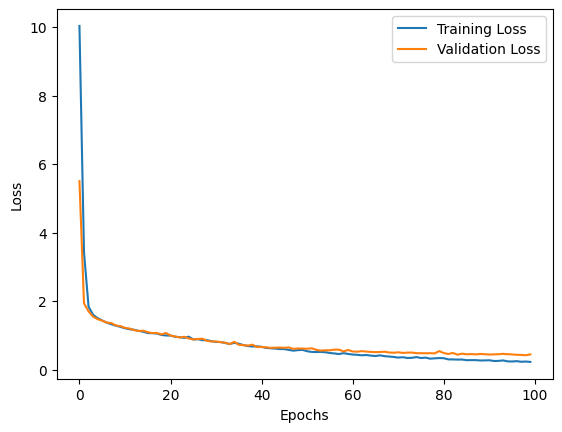

In [14]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(7,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize the training process
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [17]:
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error, r2_score


def create_model(optimizer='adam', **kwargs):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(7,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the Keras model for use with scikit-learn
keras_regressor = KerasRegressor(build_fn=create_model, epochs=150, batch_size=16, verbose=0)

# Define hyperparameters to tune
param_grid = {'optimizer': ['adam', 'sgd'],
              'batch_size': [16, 32],
              'epochs': [50, 100]}


grid_search = GridSearchCV(estimator=keras_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = grid_result.best_params_
best_model = grid_result.best_estimator_.model

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test_scaled).flatten()
mse_best = mean_squared_error(y_test, y_pred_best)
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")
print(f"Best Model Mean Squared Error on Test Set: {mse_best}")
print("Best Hyperparameters:", best_params)

C:\Users\sahith\AppData\Local\Temp\ipykernel_3572\4149855672.py:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regressor = KerasRegressor(build_fn=create_model, epochs=150, batch_size=16, verbose=0)


5/5 [==============================] - 0s 750us/step
R-squared: 0.628599378114455
Best Model Mean Squared Error on Test Set: 0.2982125848226721
Best Hyperparameters: {'batch_size': 16, 'epochs': 100, 'optimizer': 'adam'}


In [16]:
y.describe()

count    731.000000
mean       3.432941
std        1.334969
min        1.520000
25%        2.610000
50%        3.040000
75%        4.010000
max       12.180000
Name: Weekly Henry Hub Natural Gas Spot Price (Dollars per Million Btu), dtype: float64

# 5.&nbsp; Summary and future improvements

From this we can see that the current model is able to guess the infromation of the price very accurately. this is falling under the 1 standard deviation level. My future plan for this tool is to add the information about inflation and interest rates to see if the model could reach a stronger accuracy. But I think that this tool as it stands can give a good bench mark to what the price of natural gas should be based on the weather, the storages and the exports and imports. 